In [67]:
import pandas as pd
import random
import os

In [68]:
df = pd.read_csv('input/PJME_hourly.csv', index_col=False)

In [69]:
print(df.info())
# Convert the 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Check the data types again after conversion
print(df.dtypes)
print("\nFirst 5 rows of the data:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145367 entries, 0 to 145366
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145364 non-null  object 
 1   PJME_MW   145365 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB
None
Datetime    datetime64[ns]
PJME_MW            float64
dtype: object

First 5 rows of the data:
             Datetime  PJME_MW
0 2002-12-31 01:00:00      NaN
1                 NaT  25147.0
2 2002-12-31 03:00:00  24574.0
3 2002-12-31 04:00:00      NaN
4 2002-12-31 05:00:00  24860.0


Missing value 


In [70]:
# Get the number of rows and columns
num_rows, num_columns = df.shape
print(f"The file has {num_rows} rows and {num_columns} columns.")
print(df.head())

The file has 145367 rows and 2 columns.
             Datetime  PJME_MW
0 2002-12-31 01:00:00      NaN
1                 NaT  25147.0
2 2002-12-31 03:00:00  24574.0
3 2002-12-31 04:00:00      NaN
4 2002-12-31 05:00:00  24860.0


In [71]:
# Filter out rows with missing values ​​in column 'PJME_MW'
missing_rows_PJME_MW =  df[df['PJME_MW'].isnull()]
# Data has missing values ​​in column 'PJME_MW'
print(f"The data has missing values in the column'PJME_MW':\n{missing_rows_PJME_MW}")

The data has missing values in the column'PJME_MW':
             Datetime  PJME_MW
0 2002-12-31 01:00:00      NaN
3 2002-12-31 04:00:00      NaN


In [72]:
for i in range(len(df)):
    if pd.isna(df.loc[i, 'PJME_MW']):   # Check if value is NaN
        if i == 0:  # If it is the first line, replace NaN with the value of the line below and + with random
            df.loc[i, 'PJME_MW'] = df.loc[i + 1, 'PJME_MW'] + random.randint(-1,1)
        elif i == len(df) - 1:  # If it is the last line, replace NaN with the value of the line above and + with random
            df.loc[i, 'PJME_MW'] = df.loc[i - 1, 'PJME_MW'] + random.randint(-1,1)
        else:  # If NaN is in the middle lines, replace with the average of the previous and following lines
            df.loc[i, 'PJME_MW'] = (df.loc[i - 1, 'PJME_MW'] + df.loc[i + 1, 'PJME_MW']) / 2
# Check for missing values ​​after replace
missing_rows = df[df['PJME_MW'].isnull()]
print(f"Data has missing values after replacement\n{missing_rows}")
print(df.head(20))

Data has missing values after replacement
Empty DataFrame
Columns: [Datetime, PJME_MW]
Index: []
              Datetime       PJME_MW
0  2002-12-31 01:00:00  2.514600e+04
1                  NaT  2.514700e+04
2  2002-12-31 03:00:00  2.457400e+04
3  2002-12-31 04:00:00  2.471700e+04
4  2002-12-31 05:00:00  2.486000e+04
5                  NaT  2.622200e+04
6  2002-12-31 07:00:00  2.870200e+04
7  2002-12-31 08:00:00  3.069800e+04
8                  NaT  3.180000e+04
9  2002-12-31 10:00:00  3.235900e+04
10 2002-12-31 11:00:00  3.237100e+10
11 2002-12-31 12:00:00  3.190200e+04
12 2002-12-31 13:00:00  3.112600e+04
13 2002-12-31 13:00:00  3.112600e+04
14 2002-12-31 14:00:00  3.036800e+10
15 2002-12-31 15:00:00  2.956400e+04
16 2002-12-31 16:00:00 -2.909800e+04
17 2002-12-31 17:00:00  3.030800e+04
18 2002-12-31 18:00:00  3.401700e+04
19 2002-12-31 19:00:00  3.419500e+04


In [73]:
# Filter out rows with missing values ​​in column 'Datetime'
missing_rows_time = df[df['Datetime'].isnull()] 
# Print lines with missing values ​​in column 'DateTime'
print(f"Data has missing values ​​in column 'Datetime'\n{missing_rows_time}")

Data has missing values ​​in column 'Datetime'
  Datetime  PJME_MW
1      NaT  25147.0
5      NaT  26222.0
8      NaT  31800.0


In [74]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
#This is a pandas function used to convert a column or string value (or a column in a DataFrame) to datetime data type.
#errors='coerce' is used to convert unparseable values to NaT    
for i in range(len(df)):
    if pd.isna(df.loc[i, 'Datetime']):
        if i == 0:
             # If is the first line, behind fill and -  1 hour to the Datetime value
            df.loc[i, 'Datetime'] = df.loc[i + 1, 'Datetime'] - pd.Timedelta(hours=1)
        else:
            # If not the first line, forward fill and add 1 hour to the Datetime value
            df.loc[i, 'Datetime'] = df.loc[i - 1, 'Datetime'] + pd.Timedelta(hours=1)
# Print data after replacing missing values
print("\nData after replacing missing values in column 'Datetime':")
print(df.head(10))


Data after replacing missing values in column 'Datetime':
             Datetime  PJME_MW
0 2002-12-31 01:00:00  25146.0
1 2002-12-31 02:00:00  25147.0
2 2002-12-31 03:00:00  24574.0
3 2002-12-31 04:00:00  24717.0
4 2002-12-31 05:00:00  24860.0
5 2002-12-31 06:00:00  26222.0
6 2002-12-31 07:00:00  28702.0
7 2002-12-31 08:00:00  30698.0
8 2002-12-31 09:00:00  31800.0
9 2002-12-31 10:00:00  32359.0


Dublicate

In [75]:
# Handle duplicates
print("\nBefore removing duplicates:")
print(df.head(20))


Before removing duplicates:
              Datetime       PJME_MW
0  2002-12-31 01:00:00  2.514600e+04
1  2002-12-31 02:00:00  2.514700e+04
2  2002-12-31 03:00:00  2.457400e+04
3  2002-12-31 04:00:00  2.471700e+04
4  2002-12-31 05:00:00  2.486000e+04
5  2002-12-31 06:00:00  2.622200e+04
6  2002-12-31 07:00:00  2.870200e+04
7  2002-12-31 08:00:00  3.069800e+04
8  2002-12-31 09:00:00  3.180000e+04
9  2002-12-31 10:00:00  3.235900e+04
10 2002-12-31 11:00:00  3.237100e+10
11 2002-12-31 12:00:00  3.190200e+04
12 2002-12-31 13:00:00  3.112600e+04
13 2002-12-31 13:00:00  3.112600e+04
14 2002-12-31 14:00:00  3.036800e+10
15 2002-12-31 15:00:00  2.956400e+04
16 2002-12-31 16:00:00 -2.909800e+04
17 2002-12-31 17:00:00  3.030800e+04
18 2002-12-31 18:00:00  3.401700e+04
19 2002-12-31 19:00:00  3.419500e+04


In [76]:
# Remove duplicate rows based on all columns, keeping only the first row
df_cleaned = df.drop_duplicates(keep='first')

In [77]:
print("\nAfter removing duplicates:")
print(df_cleaned.head(20))


After removing duplicates:
              Datetime       PJME_MW
0  2002-12-31 01:00:00  2.514600e+04
1  2002-12-31 02:00:00  2.514700e+04
2  2002-12-31 03:00:00  2.457400e+04
3  2002-12-31 04:00:00  2.471700e+04
4  2002-12-31 05:00:00  2.486000e+04
5  2002-12-31 06:00:00  2.622200e+04
6  2002-12-31 07:00:00  2.870200e+04
7  2002-12-31 08:00:00  3.069800e+04
8  2002-12-31 09:00:00  3.180000e+04
9  2002-12-31 10:00:00  3.235900e+04
10 2002-12-31 11:00:00  3.237100e+10
11 2002-12-31 12:00:00  3.190200e+04
12 2002-12-31 13:00:00  3.112600e+04
14 2002-12-31 14:00:00  3.036800e+10
15 2002-12-31 15:00:00  2.956400e+04
16 2002-12-31 16:00:00 -2.909800e+04
17 2002-12-31 17:00:00  3.030800e+04
18 2002-12-31 18:00:00  3.401700e+04
19 2002-12-31 19:00:00  3.419500e+04
20 2002-12-31 20:00:00  3.279000e+04


In [78]:
# Check the number of rows before and after removing duplicates
num_rows_after = len(df_cleaned)
print(f"Number of rows before removing duplicates: {num_rows}")
print(f"Number of rows after removing duplicates: {num_rows_after}")

Number of rows before removing duplicates: 145367
Number of rows after removing duplicates: 145366


In [79]:
# Display the cleaned DataFrame (after handling missing values and duplicates)
print("\nData after cleaning:")
print(df_cleaned.head(20))


Data after cleaning:
              Datetime       PJME_MW
0  2002-12-31 01:00:00  2.514600e+04
1  2002-12-31 02:00:00  2.514700e+04
2  2002-12-31 03:00:00  2.457400e+04
3  2002-12-31 04:00:00  2.471700e+04
4  2002-12-31 05:00:00  2.486000e+04
5  2002-12-31 06:00:00  2.622200e+04
6  2002-12-31 07:00:00  2.870200e+04
7  2002-12-31 08:00:00  3.069800e+04
8  2002-12-31 09:00:00  3.180000e+04
9  2002-12-31 10:00:00  3.235900e+04
10 2002-12-31 11:00:00  3.237100e+10
11 2002-12-31 12:00:00  3.190200e+04
12 2002-12-31 13:00:00  3.112600e+04
14 2002-12-31 14:00:00  3.036800e+10
15 2002-12-31 15:00:00  2.956400e+04
16 2002-12-31 16:00:00 -2.909800e+04
17 2002-12-31 17:00:00  3.030800e+04
18 2002-12-31 18:00:00  3.401700e+04
19 2002-12-31 19:00:00  3.419500e+04
20 2002-12-31 20:00:00  3.279000e+04


In [80]:
from scipy.stats import zscore
# Step 1: Calculate the Z-score for the 'PJME_MW' column
df['z_score'] = zscore(df['PJME_MW'])
# Step 2: Filter out the outlier values
outliers = df[(df['z_score'].abs() > 3) | (df['PJME_MW'] < 0)]
# Step 3: Filter out the non-outlier values
valid_values = df[~df.index.isin(outliers.index)]
# Print the results
print(f"Outlier values:\n{outliers}")

Outlier values:
              Datetime       PJME_MW     z_score
10 2002-12-31 11:00:00  3.237100e+10  278.062501
14 2002-12-31 14:00:00  3.036800e+10  260.856756
16 2002-12-31 16:00:00 -2.909800e+04   -0.004233


In [81]:
# Calculate the mean value from the valid values
mean_value = valid_values['PJME_MW'].mean()
# Replace the outlier values with the mean value
df.loc[outliers.index, 'PJME_MW'] = int(mean_value)
# Print the results
print(f"Outlier values have been replaced with the mean value: {mean_value}")
print("\nData after replacing outliers:")
df = df.drop(columns=['z_score'])
print(df.head(20))

Outlier values have been replaced with the mean value: 32080.239488456566

Data after replacing outliers:
              Datetime  PJME_MW
0  2002-12-31 01:00:00  25146.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24717.0
4  2002-12-31 05:00:00  24860.0
5  2002-12-31 06:00:00  26222.0
6  2002-12-31 07:00:00  28702.0
7  2002-12-31 08:00:00  30698.0
8  2002-12-31 09:00:00  31800.0
9  2002-12-31 10:00:00  32359.0
10 2002-12-31 11:00:00  32080.0
11 2002-12-31 12:00:00  31902.0
12 2002-12-31 13:00:00  31126.0
13 2002-12-31 13:00:00  31126.0
14 2002-12-31 14:00:00  32080.0
15 2002-12-31 15:00:00  29564.0
16 2002-12-31 16:00:00  32080.0
17 2002-12-31 17:00:00  30308.0
18 2002-12-31 18:00:00  34017.0
19 2002-12-31 19:00:00  34195.0


Saving new Data

In [82]:
# Save the cleaned data to a new CSV file
def save_cleaned_file(df_cleaned, output_folder="output", output_file_name="cleaned_data.csv"):
    if df_cleaned is not None:
        os.makedirs(output_folder, exist_ok=True)
        output_path = os.path.join(output_folder, output_file_name)
        try:
            df_cleaned.to_csv(output_path, index=False)
            print(f"Cleaned file saved to '{output_path}'")
        except Exception as e:
            print(f"Error saving the cleaned file: {e}")

In [83]:
df.to_csv('output/PJME_hourly_fixed.csv', index=False)

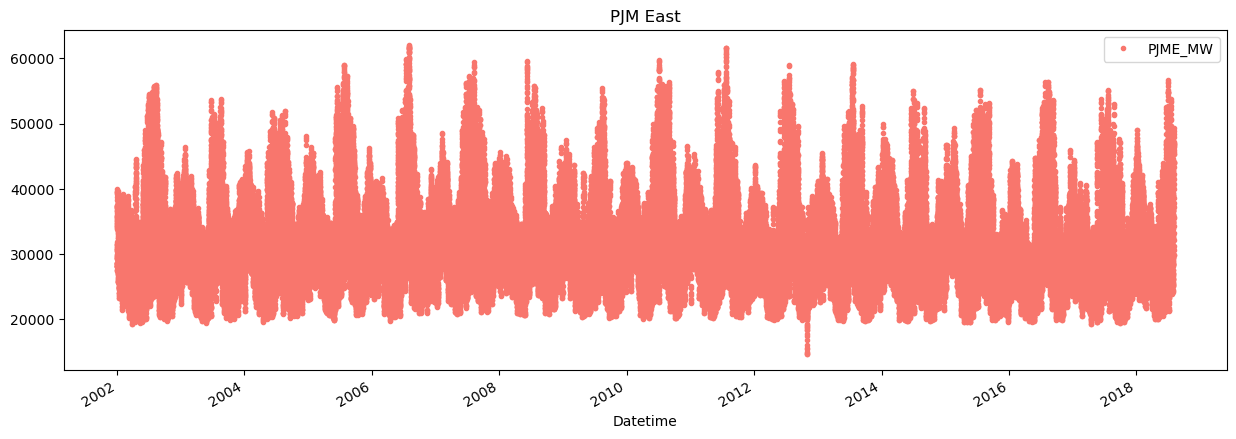

In [84]:
pjme = pd.read_csv('output/PJME_hourly_fixed.csv', index_col=[0], parse_dates=[0]) #parse_dates change first columm to  datatime 
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"] #color for plot
# #F8766D : orange , #D39200 : brown , #93AA00 : green , #00BA38 : cyan
_ = pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East') #draw plot